In [ ]:
!pip install category_encoders
!pip install catboost
!pip install str2bool

     |████████████████████████████████| 86 kB 2.9 MB/s 
     |████████████████████████████████| 76.6 MB 1.3 MB/s 
  Created wheel for str2bool: filename=str2bool-1.1-py3-none-any.whl size=1661 sha256=9ae6fcc5b06bee937cd283682b822a3c9f08913615e13e068ecb616c7b5a2d45
  Stored in directory: /root/.cache/pip/wheels/96/86/b0/b511a3f914ba79c8936ccd81a544359f2d476961ea7b9dd2d8
Successfully built str2bool


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Delivery-Delay-Prediction-main (1)/Delivery-Delay-Prediction-main')
!pwd

/content/drive/MyDrive/Delivery-Delay-Prediction-main (1)/Delivery-Delay-Prediction-main


In [ ]:
# Load all helper function
%run -i './util/helper.py'
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import plot_roc_curve
from str2bool import str2bool

#Load Data and Data Split

In [ ]:
df  = pd.read_csv('./Dataset/brazilian_ecommerce_encoded_scaled.csv')
y = df["is_delayed"]
X = df.drop(["is_delayed"], axis=1, inplace=False)

In [ ]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, random_state=random_state, test_size=0.2, stratify=y)

In [ ]:
print(X_dev.shape)
print(X_test.shape)

(92506, 29)
(23127, 29)


In [ ]:
# df1  = pd.read_csv('./Dataset/brazilian_ecommerce_encoded.csv')
# y1 = df1["is_delayed"]
# X1 = df1.drop(["is_delayed"], axis=1, inplace=False)

In [ ]:
# X_dev1, X_test1, y_dev1, y_test1 = train_test_split(X1, y1, random_state=random_state, test_size=0.2, stratify=y1)

#Model Loading

In [ ]:
dummy_downsampling_model_path = './Model/Dummy_downsampling.sav'
dummy_stratified_model_path = './Model/Dummy_stratified.sav'
catboost_downsampling_model_path = './Model/CatBoost_downsampling.sav'
catboost_stratified_model_path = './Model/CatBoost_stratified.sav' 
lightgbm_downsampling_model_path = './Model/LightGBM_downsampling.sav'
lightgbm_stratified_model_path = './Model/LightGBM_stratified.sav' 
randomforest_downsampling_model_path = './Model/RandomForest_downsampling.sav'
randomforest_stratified_model_path = './Model/RandomForest_stratified_clf.sav' 
svm_downsampling_model_path = './Model/SVM_downsampling.sav'
svm_stratified_model_path = './Model/SVM_stratified.sav'
xgboost_downsampling_model_path = './Model/XGBoost_downsampling.sav'
xgboost_stratified_model_path = './Model/XGBoost_stratified.sav'
logistic_downsampling_model_path = './Model/logistic_downsampling.sav'
logistic_stratified_model_path = './Model/logistic_stratified.sav' 

In [ ]:
dummy_downsampling_model = pickle.load(open(dummy_downsampling_model_path,'rb'))
dummy_stratified_model = pickle.load(open(dummy_stratified_model_path,'rb'))
catboost_downsampling_model = pickle.load(open(catboost_downsampling_model_path,'rb'))
catboost_stratified_model = pickle.load(open(catboost_stratified_model_path,'rb'))
lightgbm_downsampling_model = pickle.load(open(lightgbm_downsampling_model_path,'rb'))
lightgbm_stratified_model = pickle.load(open(lightgbm_stratified_model_path,'rb'))
randomforest_downsampling_model = pickle.load(open(randomforest_downsampling_model_path,'rb'))
randomforest_stratified_model = pickle.load(open(randomforest_stratified_model_path,'rb'))
svm_downsampling_model = pickle.load(open(svm_downsampling_model_path,'rb'))
svm_stratified_model = pickle.load(open(svm_stratified_model_path,'rb'))
# xgboost_downsampling_model = pickle.load(open(xgboost_downsampling_model_path,'rb'))
# xgboost_stratified_model = pickle.load(open(xgboost_stratified_model_path,'rb'))
logistic_downsampling_model = pickle.load(open(logistic_downsampling_model_path,'rb'))
logistic_stratified_model = pickle.load(open(logistic_stratified_model_path,'rb'))

# Probability Predictions on Test Dataset (Stratified)



In [ ]:
lightgbm_probs_stratified = lightgbm_stratified_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, lightgbm_probs_stratified, pos_label = 1)

logistic_probs_stratified = logistic_stratified_model.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, logistic_probs_stratified, pos_label = 1)

dummy_probs_stratified = dummy_stratified_model.predict_proba(X_test)[:,1]
fpr2, tpr2, thresholds2 = roc_curve(y_test, dummy_probs_stratified, pos_label = 1)

svm_probs_stratified = svm_stratified_model.decision_function(X_test)
fpr3, tpr3, thresholds3 = roc_curve(y_test, svm_probs_stratified, pos_label = 1)

random_probs_stratified = randomforest_stratified_model.predict_proba(X_test)[:,1]
fpr4, tpr4, thresholds4 = roc_curve(y_test, random_probs_stratified, pos_label = 1)

# xgb_probs_stratified = pipe_XGB.predict_proba(X_test)[:,1]
# fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label = 1)

catboost_probs_stratified = catboost_stratified_model.predict_proba(X_test)[:,1]
fpr5, tpr5, thresholds5 = roc_curve(y_test, catboost_probs_stratified, pos_label = 1)

# AUC-ROC Comparison

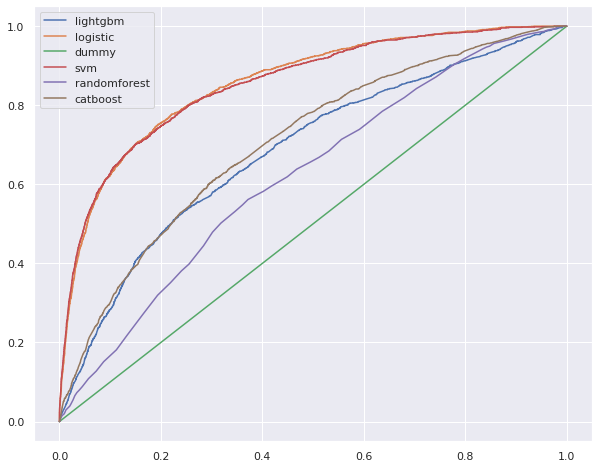

In [ ]:
figure(figsize=(10, 8))

plt.plot(fpr, tpr, label = 'lightgbm')
plt.plot(fpr1, tpr1, label = 'logistic')
plt.plot(fpr2, tpr2, label = 'dummy')
plt.plot(fpr3, tpr3, label = 'svm')
plt.plot(fpr4, tpr4, label = 'randomforest')
plt.plot(fpr5, tpr5, label = 'catboost')
plt.legend()

#Predictions on test

In [ ]:
dummy_prediction = dummy_stratified_model.predict(X_test)
recall, precision = recall_score(y_test,dummy_prediction), precision_score(y_test,dummy_prediction)

logistic_prediction = logistic_stratified_model.predict(X_test)
recall1, precision1 = recall_score(y_test, logistic_prediction), precision_score(y_test, logistic_prediction)

SVM_prediction = svm_stratified_model.predict(X_test)
recall2, precision2 = recall_score(y_test,SVM_prediction), precision_score(y_test,SVM_prediction)

randomforest_prediction = randomforest_stratified_model.predict(X_test)
recall3, precision3 = recall_score(y_test, randomforest_prediction), precision_score(y_test, randomforest_prediction)

LGB_prediction = lightgbm_stratified_model.predict(X_test)
recall4, precision4 = recall_score(y_test,LGB_prediction), precision_score(y_test,LGB_prediction)

CB_prediction = np.array([str2bool(p) for p in catboost_stratified_model.predict(X_test)])
recall5, precision5 = recall_score(y_test,CB_prediction), precision_score(y_test,CB_prediction)

# XGB_prediction = xgboost_stratified_model.predict(X_test)
# recall6, precision6 = recall_score(y_test,XGB_prediction), precision_score(y_test,XGB_prediction)

# Precision Recall Plot

Text(0.5, 0.98, 'Precision Curve comparison')

<Figure size 5600x4800 with 0 Axes>

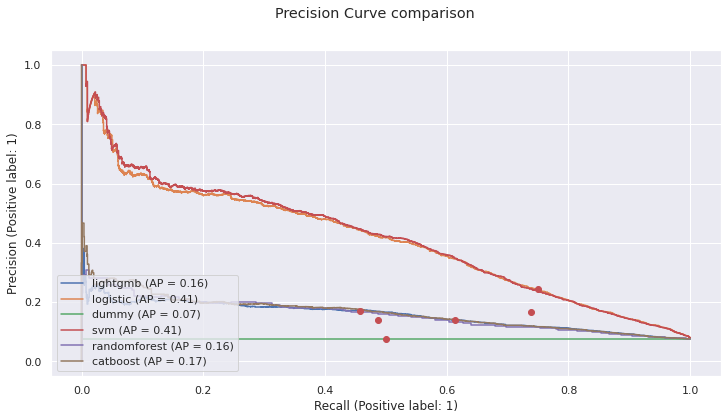

In [34]:
figure(figsize=(14, 12), dpi = 400)

fig = PrecisionRecallDisplay.from_predictions(y_test, lightgbm_probs_stratified, name = "lightgmb")
fig = PrecisionRecallDisplay.from_predictions(y_test, logistic_probs_stratified, ax = fig.ax_, name = "logistic")
fig = PrecisionRecallDisplay.from_predictions(y_test, dummy_probs_stratified, ax = fig.ax_, name = "dummy")
fig = PrecisionRecallDisplay.from_predictions(y_test, svm_probs_stratified, ax = fig.ax_, name = "svm")
fig = PrecisionRecallDisplay.from_predictions(y_test, random_probs_stratified, ax = fig.ax_, name = "randomforest")
fig = PrecisionRecallDisplay.from_predictions(y_test, catboost_probs_stratified, ax = fig.ax_, name = "catboost")
# fig = PrecisionRecallDisplay.from_predictions(y_test, xgb_probs_stratified, ax = fig.ax_, name = "XGBoost")

plt.plot(recall, precision,'ro', label = 'dummy')
plt.plot(recall1, precision2,'ro', label = 'logistic') 
plt.plot(recall2, precision3,'ro', label = 'svm') 
plt.plot(recall3, precision4,'ro', label = 'randomforest') 
plt.plot(recall4, precision5,'ro', label = 'lightgbm')
plt.plot(recall5, precision5,'ro', label = 'catboost')
# plt.legend()   

fig.figure_.suptitle("Precision Curve comparison") 

# Probability Predictions on Test Dataset (Downsampling)

In [35]:
lightgbm_probs_down = lightgbm_downsampling_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, lightgbm_probs_down, pos_label = 1)

logistic_probs_down = logistic_downsampling_model.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, logistic_probs_down, pos_label = 1)

dummy_probs_down = dummy_downsampling_model.predict_proba(X_test)[:,1]
fpr2, tpr2, thresholds2 = roc_curve(y_test, dummy_probs_down, pos_label = 1)

svm_probs_down = svm_downsampling_model.decision_function(X_test)
fpr3, tpr3, thresholds3 = roc_curve(y_test, svm_probs_down, pos_label = 1)

random_probs_down = randomforest_downsampling_model.predict_proba(X_test)[:,1]
fpr4, tpr4, thresholds4 = roc_curve(y_test, random_probs_down, pos_label = 1)

# xgb_probs_down = xgboost_downsampling_model.predict_proba(X_test)[:,1]
# fpr, tpr, thresholds = roc_curve(y_test, xgb_probs_down, pos_label = 1)

catboost_probs_down = catboost_downsampling_model.predict_proba(X_test)[:,1]
fpr5, tpr5, thresholds5 = roc_curve(y_test, catboost_probs_down, pos_label = 1)

# AUC-ROC Curve

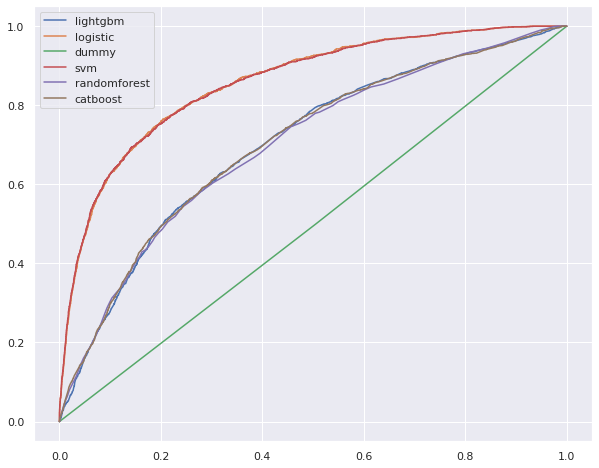

In [36]:
figure(figsize=(10, 8))

plt.plot(fpr, tpr, label = 'lightgbm')
plt.plot(fpr1, tpr1, label = 'logistic')
plt.plot(fpr2, tpr2, label = 'dummy')
plt.plot(fpr3, tpr3, label = 'svm')
plt.plot(fpr4, tpr4, label = 'randomforest')
plt.plot(fpr5, tpr5, label = 'catboost')
plt.legend()

# Predictions on Test

In [32]:
dummy_prediction = dummy_downsampling_model.predict(X_test)
recall, precision = recall_score(y_test,dummy_prediction), precision_score(y_test,dummy_prediction)

logistic_prediction = logistic_downsampling_model.predict(X_test)
recall1, precision1 = recall_score(y_test, logistic_prediction), precision_score(y_test, logistic_prediction)

SVM_prediction = svm_downsampling_model.predict(X_test)
recall2, precision2 = recall_score(y_test,SVM_prediction), precision_score(y_test,SVM_prediction)

randomforest_prediction = randomforest_downsampling_model.predict(X_test)
recall3, precision3 = recall_score(y_test, randomforest_prediction), precision_score(y_test, randomforest_prediction)

LGB_prediction = lightgbm_downsampling_model.predict(X_test)
recall4, precision4 = recall_score(y_test,LGB_prediction), precision_score(y_test,LGB_prediction)

CB_prediction = np.array([str2bool(p) for p in catboost_downsampling_model.predict(X_test)])
recall5, precision5 = recall_score(y_test,CB_prediction), precision_score(y_test,CB_prediction)

# XGB_prediction = xgboost_downsampling_model.predict(X_test)
# recall6, precision6 = recall_score(y_test,XGB_prediction), precision_score(y_test,XGB_prediction)

#Precision-Recall Plot

Text(0.5, 0.98, 'Precision Curve comparison')

<Figure size 5600x4800 with 0 Axes>

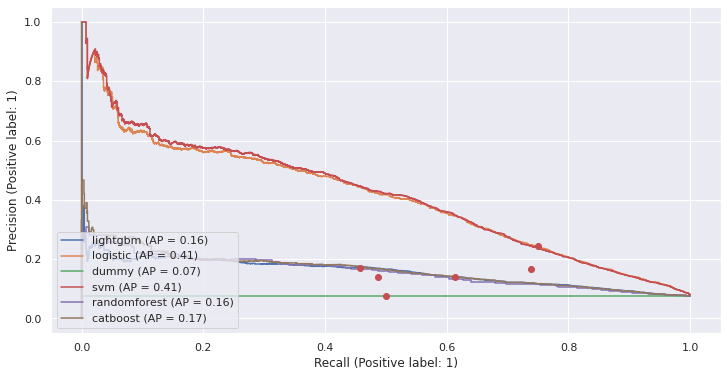

In [38]:
figure(figsize=(14, 12), dpi = 400)

fig1 = PrecisionRecallDisplay.from_predictions(y_test, lightgbm_probs_down, name = "lightgbm")
fig1 = PrecisionRecallDisplay.from_predictions(y_test, logistic_probs_down, ax = fig1.ax_, name = "logistic")
fig1 = PrecisionRecallDisplay.from_predictions(y_test, dummy_probs_down, ax = fig1.ax_, name = "dummy")
fig1 = PrecisionRecallDisplay.from_predictions(y_test, svm_probs_down, ax = fig1.ax_, name = "svm")
fig1 = PrecisionRecallDisplay.from_predictions(y_test, random_probs_down, ax = fig1.ax_, name = "randomforest")
fig1 = PrecisionRecallDisplay.from_predictions(y_test, catboost_probs_down, ax = fig1.ax_, name = "catboost")
# fig = PrecisionRecallDisplay.from_predictions(y_test, xgb_probs_down, ax = fig.ax_, name = "XGBoost")

plt.plot(recall, precision,'ro', label = 'dummy')
plt.plot(recall1, precision2,'ro', label = 'logistic') 
plt.plot(recall2, precision3,'ro', label = 'svm') 
plt.plot(recall3, precision4,'ro', label = 'randomforest') 
plt.plot(recall4, precision5,'ro', label = 'lightgbm')
plt.plot(recall5, precision5,'ro', label = 'catboost')
# plt.legend()   

fig.figure_.suptitle("Precision Curve comparison") 